In [2]:
import numpy as np
import pandas as pd
import h5py

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.ticker import LogLocator
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import AutoMinorLocator
import scienceplots

In [3]:
#Routine for extracting information from the commented header lines
def find_in_header(filename, header):
    with open(filename, "r") as f:
        for line in f:
            if line[0:(len(header))]==header:
                return(line[len(header):].split())


BP_file = 'BP.out' #Neighbor files output by "find_neighbors" program (added to UniverseMachine)
SMDPL_file = 'SMDPL.out' 

column_labels = find_in_header(BP_file,'#Header:')

#Record the positions of each section
neighbors = np.arange(0,51,1)

column_indices = {}
loc_ID = []
loc_X = []
loc_Y = []
loc_HM = []
loc_SM = []
loc_Dist = []
loc_Cyl = []
for x in range(len(column_labels)):
    if "Halo_ID" in column_labels[x]:
        loc_ID.append(x)
    elif "Halo_Mass" in column_labels[x]:
        loc_HM.append(x)
    elif "Stellar_Mass" in column_labels[x]:
        loc_SM.append(x)
    elif "Distance" in column_labels[x]:
        loc_Dist.append(x)
    elif "Cylinder" in column_labels[x]:
        loc_Cyl.append(x)
    elif "X" in column_labels[x]:
        loc_X.append(x)
    elif "Y" in column_labels[x]:
        loc_Y.append(x)

column_indices['ID'] = loc_ID
column_indices['X'] = loc_X
column_indices['Y'] = loc_Y
column_indices['HM'] = loc_HM
column_indices['SM'] = loc_SM
column_indices['Dist'] = loc_Dist
column_indices['Cylinder'] = loc_Cyl

#BP = pd.read_csv(BP_file, sep='\s+', comment='#', names=column_labels,low_memory=False)
SMDPL = pd.read_csv(SMDPL_file, sep='\s+', comment='#', names=column_labels,low_memory=False)

In [4]:
h=0.68

In [6]:
######################## GET NUMERICAL VALUES #######################
#total_gals_BP = len(BP)
#HMs_BP = np.log10(BP['Halo_Mass']/h)

total_gals_SMDPL = len(SMDPL)
HMs_SMDPL = np.log10(SMDPL['Halo_Mass']/h)


def get_ratio(HMs,low,high):
    x = np.where((HMs>=low)&(HMs<high))[0]
    print(len(x))
    ratio = len(x)/len(HMs)
    print(ratio*100)
    return ratio

"""
print("BP")
print("Total Galaxies: " + str(total_gals_BP))
print("<10.5")
get_ratio(HMs_BP,0,10.5)
print("10.5 <= x < 13")
get_ratio(HMs_BP,10.5,13)
print(">= 13")
get_ratio(HMs_BP,13,np.inf)
print(">= 14")
get_ratio(HMs_BP,14,np.inf)
print(">= 15")
get_ratio(HMs_BP,15,np.inf)
print('\n\n')"""


print("SMDPL")
print("Total Galaxies: " + str(total_gals_SMDPL))
print("<10.5")
get_ratio(HMs_SMDPL,0,10.5)
print("10.5 <= x < 13")
get_ratio(HMs_SMDPL,10.5,13)
print(">= 13")
get_ratio(HMs_SMDPL,13,np.inf)
print(">= 14")
get_ratio(HMs_SMDPL,14,np.inf)
print(">= 15")
get_ratio(HMs_SMDPL,15,np.inf)

SMDPL
Total Galaxies: 2877669
<10.5
1274
0.044271943715555886
10.5 <= x < 13
2820362
98.00856179081055
>= 13
56033
1.947166265473896
>= 14
3455
0.12006245332593846
>= 15
54
0.0018765188074097471


1.876518807409747e-05

In [7]:
colors = ['#fde725','#5ec962','#21918c','#3b528b','#440154']

# Mass Distribution

Stellar vs. Halo mass distributions for SMDPL box sample (<10^9 stellar mass galaxies removed)

In [8]:
################# MASS DISTRIBUTIONS ######################3

def get_mass_function(Masses,bins,V):
    hist,bin_edges = np.histogram(np.log10(Masses),bins=bins) #Unnormalized histogram
    dM = bin_edges[1] - bin_edges[0]    #Bin size
    centers = bin_edges[0:-1] + dM/2    #Bin centers
    N_hist = hist / V / dM                 #Normalize histogram

    return(dM,centers,N_hist)



h=0.68
V_BP = 250**3
V_SMDPL = 400**3

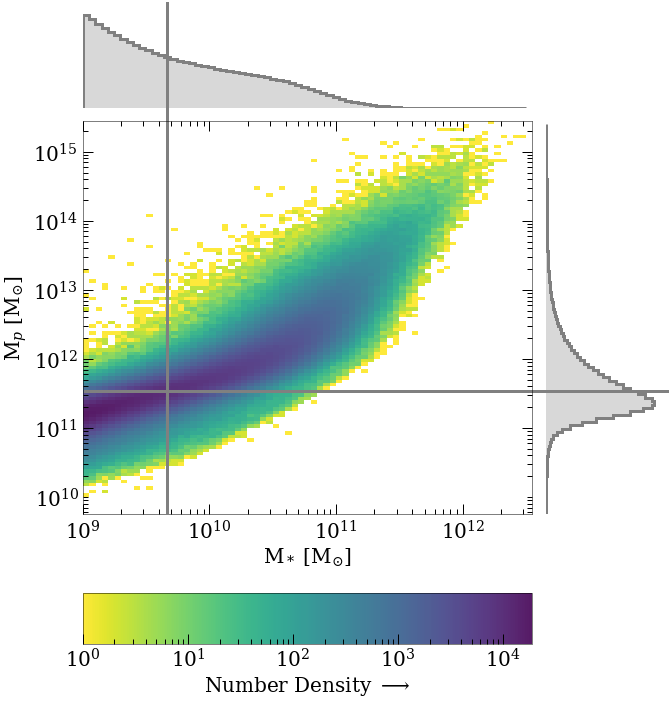

In [9]:
import scienceplots
plt.style.use(['science','no-latex'])
plt.rcParams['font.size']= 20

fig = plt.figure(figsize=(10, 10),facecolor='w')
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.2, top=0.9,
                      wspace=0.05, hspace=0.05)

SM_bins = pow(10,np.arange(9,12.6,0.05))
HM_bins = pow(10,np.arange(9.75,15.5,0.05))

ax = fig.add_subplot(gs[1, 0])
h2d = ax.hist2d(SMDPL['Stellar_Mass(0)'],SMDPL['Halo_Mass']/h,
          bins=[SM_bins,HM_bins],cmap='viridis_r',norm=mcolors.LogNorm(),alpha=0.9)
ax.set(xlabel=r'M$_*$ [M$_{\odot}$]',
       ylabel=r'M$_p$ [M$_{\odot}$]',
       xscale='log',yscale='log')

SM_med_SMDPL = np.median(SMDPL['Stellar_Mass(0)'])
HM_med_SMDPL = np.median(SMDPL['Halo_Mass']/h)

ax_histx = fig.add_subplot(gs[0, 0])

dM,centers,hist = get_mass_function(SMDPL['Stellar_Mass(0)'],
                                    np.log10(SM_bins),V_SMDPL)
ax_histx.bar(centers,hist,width=dM,label='SMDPL',
        color='grey',alpha=0.3,lw=2)
edges = np.append(centers,centers[-1]+dM)-dM/2
ax_histx.stairs(hist,edges,color='grey',lw=3)

ax_histx.axis("off")
ax_histx.set_xlim(9,12.6)

ax_histy = fig.add_subplot(gs[1, 1])
dM,centers,hist = get_mass_function(SMDPL['Halo_Mass']/h,
                                    np.log10(HM_bins),V_SMDPL)
ax_histy.barh(centers,hist,height=dM,label='SMDPL',
        color='gray',alpha=0.3)
edges = np.append(centers,centers[-1]+dM)-dM/2
ax_histy.stairs(hist,edges,color='gray',lw=3,orientation='horizontal')

ax_histy.axis("off")
ax_histy.set(xlabel='N')
ax_histy.set_ylim(9.75,15.5)

ax.axvline(SM_med_SMDPL,ymin=0.005,ymax=1.3,c='gray',lw=3,alpha=1,clip_on=False)
ax.axhline(HM_med_SMDPL,xmin=0.005,xmax=1.3,c='gray',lw=3,alpha=1,clip_on=False)

cax = fig.add_axes([ax.get_position().x0,ax.get_position().y0-0.18,
                    ax.get_position().x1-0.1,ax.get_position().y0-0.13])

plt.colorbar(h2d[3],orientation='horizontal',cax=cax)
cax.tick_params(axis="x")
cax.xaxis.set_major_locator(FixedLocator([1,10,1e2,1e3,1e4]))
cax_ticks = [0,1,2,3,4]
cax.xaxis.set_ticklabels(["$10^{{{:d}}}$".format(x) for x in cax_ticks],
                         fontsize=20)
cax.set(xlabel=r'Number Density $\longrightarrow$')

x_ticks = pow(10,np.array([9,10,11,12]))
ax.xaxis.set_major_locator(FixedLocator(x_ticks))
ax.xaxis.set_minor_locator(LogLocator(subs=np.arange(0.1,1,0.1)))


y_ticks = pow(10,np.array([11,12,13,14,15]))
ax.yaxis.set_major_locator(FixedLocator(y_ticks))
ax.yaxis.set_minor_locator(LogLocator(subs=np.arange(0.1,1,0.1)))


ax.tick_params(which='major', width=1.0, length=10,labelsize=20,pad=5)
ax.tick_params(which='minor', width=1.0, length=5)

cax.tick_params(which='major', width=1.0, length=10,labelsize=20)
cax.tick_params(which='minor', width=1.0, length=5)

plt.savefig("Figures/Mass_Distribution.pdf")

# Satellite fraction

Get satellite fraction as a function of halo mass

In [ ]:
################# Centrals vs Satellites ###############

dtype = np.dtype(dtype=[('id', 'i8'),('descid','i8'),('upid','i8'),
                        ('flags', 'i4'), ('uparent_dist', 'f4'),
                        ('pos', 'f4', (6)), ('vmp', 'f4'), ('lvmp', 'f4'),
                        ('mp', 'f4'), ('m', 'f4'), ('v', 'f4'), ('r', 'f4'),
                        ('rank1', 'f4'), ('rank2', 'f4'), ('ra', 'f4'),
                        ('rarank', 'f4'), ('A_UV', 'f4'), ('sm', 'f4'),
                        ('icl', 'f4'), ('sfr', 'f4'), ('obs_sm', 'f4'),
                        ('obs_sfr', 'f4'), ('obs_uv', 'f4'), ('empty', 'f4')],
                 align=True)

SMDPL2 = np.fromfile('UniverseMachine/sfr_catalog_1.000000.bin',dtype)

#Put data in Pandas Dataframe
SMDPL_df = pd.DataFrame({
    'ID':SMDPL2['id'],
    'UPID':SMDPL2['upid'],
    'Flag':SMDPL2['flags']
})

ignore_flags=[16,17,18,20,24,48]
SMDPL_df = SMDPL_df[~SMDPL_df['Flag'].isin(ignore_flags)]

halos_combo = SMDPL.merge(SMDPL_df,left_on='Halo_ID(0)',right_on='ID',how='left')

centrals = halos_combo[halos_combo['UPID']==-1]
satellites = halos_combo[halos_combo['UPID']!=-1]

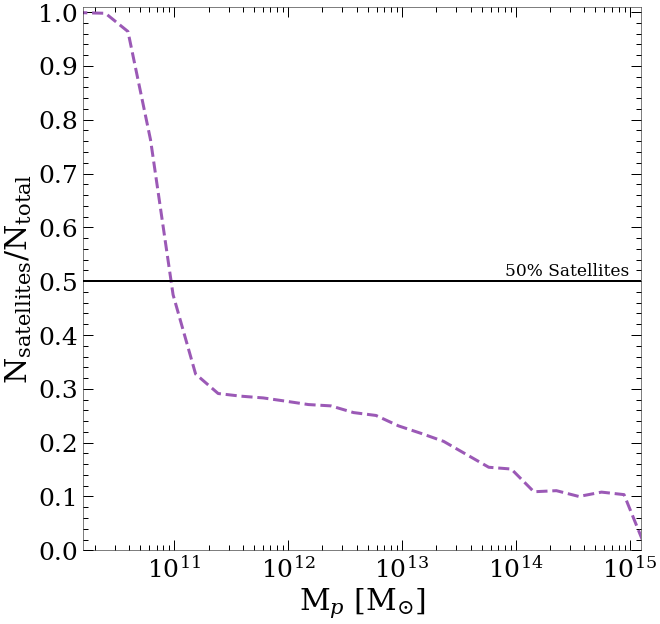

In [18]:
def get_satellite_frac(bins):
    frac_satellites = []
    for i in range(len(bins)-1):
        c_bin = len(np.where((np.log10(centrals['Halo_Mass'])>bins[i])&(np.log10(centrals['Halo_Mass'])<bins[i+1]))[0])
        s_bin = len(np.where((np.log10(satellites['Halo_Mass'])>bins[i])&(np.log10(satellites['Halo_Mass'])<bins[i+1]))[0])
        total = c_bin + s_bin
        if total!= 0:
            frac_satellites.append(s_bin/total)
        else:
            frac_satellites.append(2)
    return frac_satellites

fig4,ax4 = plt.subplots(figsize=(10,10),facecolor='w')

bins = np.arange(9.9,15.4,0.2)
bin_edges,bin_centers,bin_Q1,bin_med,bin_Q3 = bin_data(np.log10(SMDPL['Halo_Mass']),
                                                       np.log10(SMDPL['Dist_CM']),bins)


ax4.plot(pow(10,bin_centers),get_satellite_frac(bins),lw=3,color=colors[3],
         linestyle='dashed',label='Fraction Satellites')
plt.axhline(0.5,color='k',lw=2)



ax4.set(xlabel=r'M$_p$ [M$_{\odot}$]',
        ylabel=r'N$_{\mathrm{satellites}}$/N$_{\mathrm{total}}$', #(Fraction of galaxies that are satellites)
        xlim=(pow(10,10.2),pow(10,15.1)),ylim=(0,1.01),xscale='log');


x_ticks = pow(10,np.array([11,12,13,14,15]))
ax4.xaxis.set_major_locator(FixedLocator(x_ticks))
ax4.xaxis.set_minor_locator(LogLocator(subs=np.arange(0.1,1,0.1)))

y_ticks = np.arange(0,1.1,0.1)
ax4.yaxis.set_major_locator(FixedLocator(y_ticks))



ax4.tick_params(which='major', width=1.0, length=10, pad=5)
ax4.tick_params(which='minor', width=1.0, length=5)


ax4.annotate('50% Satellites',(8e13,0.51),size=17)

for item in [ax4.xaxis.label, ax4.yaxis.label]:
    item.set_fontsize(30)

plt.savefig("Figures/Q_sat.pdf")

# Binned Environmental Measure Stats

In [10]:
########################## BIN/STATS FUNCTIONS #####################


#Bin by halo mass
import scipy.stats as stats

def find_Q1(data):
    return np.percentile(data,16)

def find_Q3(data):
    return np.percentile(data,84)

def bin_data(X,y,nbins):
    bin_med, bin_edges, binnumber = stats.binned_statistic(X,y,
                                                             statistic='median',
                                                             bins=nbins)
    bin_Q1, bin_edges, binnumber = stats.binned_statistic(X,y,
                                                            statistic=find_Q1,
                                                            bins=nbins)
    bin_Q3, bin_edges, binnumber = stats.binned_statistic(X,y,
                                                            statistic=find_Q3,
                                                            bins=nbins)

    bin_width = np.log10(bin_edges[1]) - np.log10(bin_edges[0])
    bin_centers = pow(10,np.log10(bin_edges[1:]) - bin_width/2)
    return(bin_edges,bin_centers,bin_Q1,bin_med,bin_Q3)


## Distance to kNN vs. Halo Mass

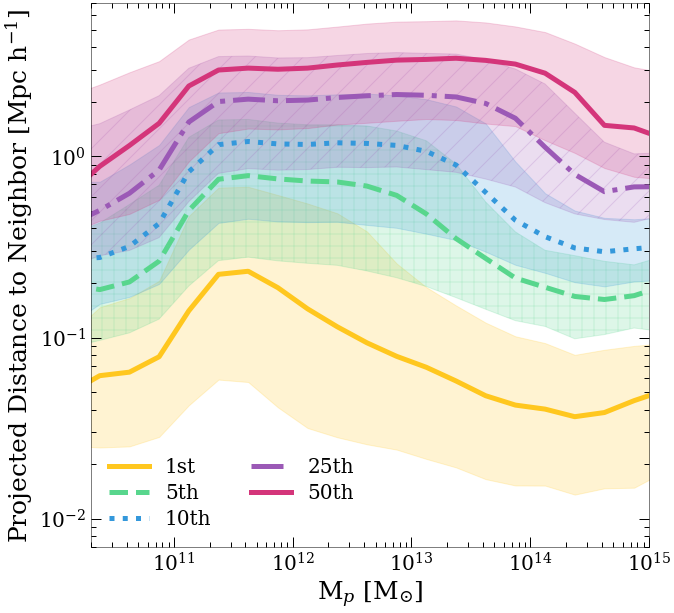

In [29]:
fig2,ax2 = plt.subplots(figsize=(10,10),facecolor='w')
plt.rcParams['font.size']= 25
plt.rcParams['figure.facecolor'] = 'w'

dists = [1,5,10,25,50]
labels = ['1st','5th','10th','25th','50th']
hatches = [None,'+',None,'/',None]
ls = ['solid','dashed','dotted','dashdot','solid']
for i in range(len(dists)):
    Distance = SMDPL['Distance('+str(dists[i])+')']
    bins = pow(10,np.arange(9.75,15.6,0.25))
    edges,centers,q1,q2,q3 = bin_data(SMDPL['Halo_Mass']/h,Distance,bins)
    ax2.plot(centers,q2,linestyle=ls[i],
                color=colors[i],label=labels[i],lw=5)
    ax2.fill_between(centers,q1,q3,alpha=0.2,color=colors[i],hatch=hatches[i])

ax2.set(xlabel=r'M$_p$ [M$_{\odot}$]',
        ylabel=r'Projected Distance to Neighbor [Mpc h$^{-1}$]',
        xscale='log',yscale='log',ylim=(0.007,7),xlim=(2e10,1e15))

ax2.tick_params(which='major', width=1.0, length=10,labelsize=20,pad=5)
ax2.tick_params(which='minor', width=1.0, length=5,labelsize=20)

plt.legend(loc=3,fontsize=20,markerscale=2.0,
          labelspacing=0.35,frameon=False,ncol=2)

plt.savefig("Figures/Dists1.pdf")

## N counts in cylinder vs. Halo Mass

Includes all redshift bins

In [21]:
############### NEIGHBOR COUNTS #################
loc_Cyl_05 = []
loc_Cyl_1 = []
loc_Cyl_2 = []
loc_Cyl_5 = []
for x in range(len(column_labels)):
    if "0.5Mpc" in column_labels[x]:
        loc_Cyl_05.append(x)
    elif "1Mpc" in column_labels[x]:
        loc_Cyl_1.append(x)
    elif "2Mpc" in column_labels[x]:
        loc_Cyl_2.append(x)
    elif "_5Mpc" in column_labels[x]:
        loc_Cyl_5.append(x)

column_indices['Cyl_05'] = loc_Cyl_05
column_indices['Cyl_1'] = loc_Cyl_1
column_indices['Cyl_2'] = loc_Cyl_2
column_indices['Cyl_5'] = loc_Cyl_5

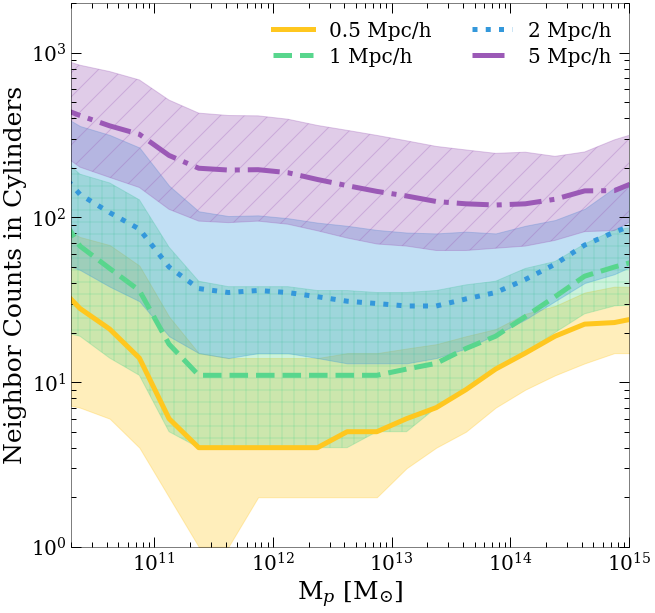

In [30]:
fig4,ax4 = plt.subplots(figsize=(10,10),facecolor='w')
plt.rcParams['font.size']= 25
plt.rcParams['figure.facecolor'] = 'w'


labels = ['0.5 Mpc/h','1 Mpc/h','2 Mpc/h','5 Mpc/h']

hatches = [None,'+',None,'/']
ls = ['solid','dashed','dotted','dashdot']

for i in range(len(rads)):
    counts = SMDPL.iloc[:,column_indices['Cyl_'+rads[i]]].sum(axis=1)
    nbins = pow(10,np.arange(9.75,15.6,0.25))
    bin_edges,bin_centers,bin_Q1,bin_med,bin_Q3 = bin_data(SMDPL['Halo_Mass']/h,counts,nbins)
    ax4.plot(bin_centers,bin_med,linestyle=ls[i],label=labels[i],lw=5,
                color=colors[i])
    ax4.fill_between(bin_centers,bin_Q1,bin_Q3,alpha=0.3,color=colors[i],hatch=hatches[i])

ax4.set(xlabel=r'M$_p$ [M$_{\odot}$]',
        ylabel=r'Neighbor Counts in Cylinders',
        xscale='log',yscale='log',
        ylim=(1,2e3),xlim=(2e10,1e15))

ax4.tick_params(which='major', width=1.0, length=10,labelsize=20,pad=5)
ax4.tick_params(which='minor', width=1.0, length=5,labelsize=20)

plt.legend(loc=1,fontsize=20,markerscale=2.0,
          labelspacing=0.35,frameon=False,ncol=2)


plt.savefig("Figures/Counts1.pdf")

# Reverse Figures

## Halo Mass vs. Distance to kNN

a. All halos

b. Centrals only

c. All halos hosting galaxies with $M_*>10^{11} M_{\odot}$

d. Centrals hosting galaixes with $M_*>10^{11} M_{\odot}$

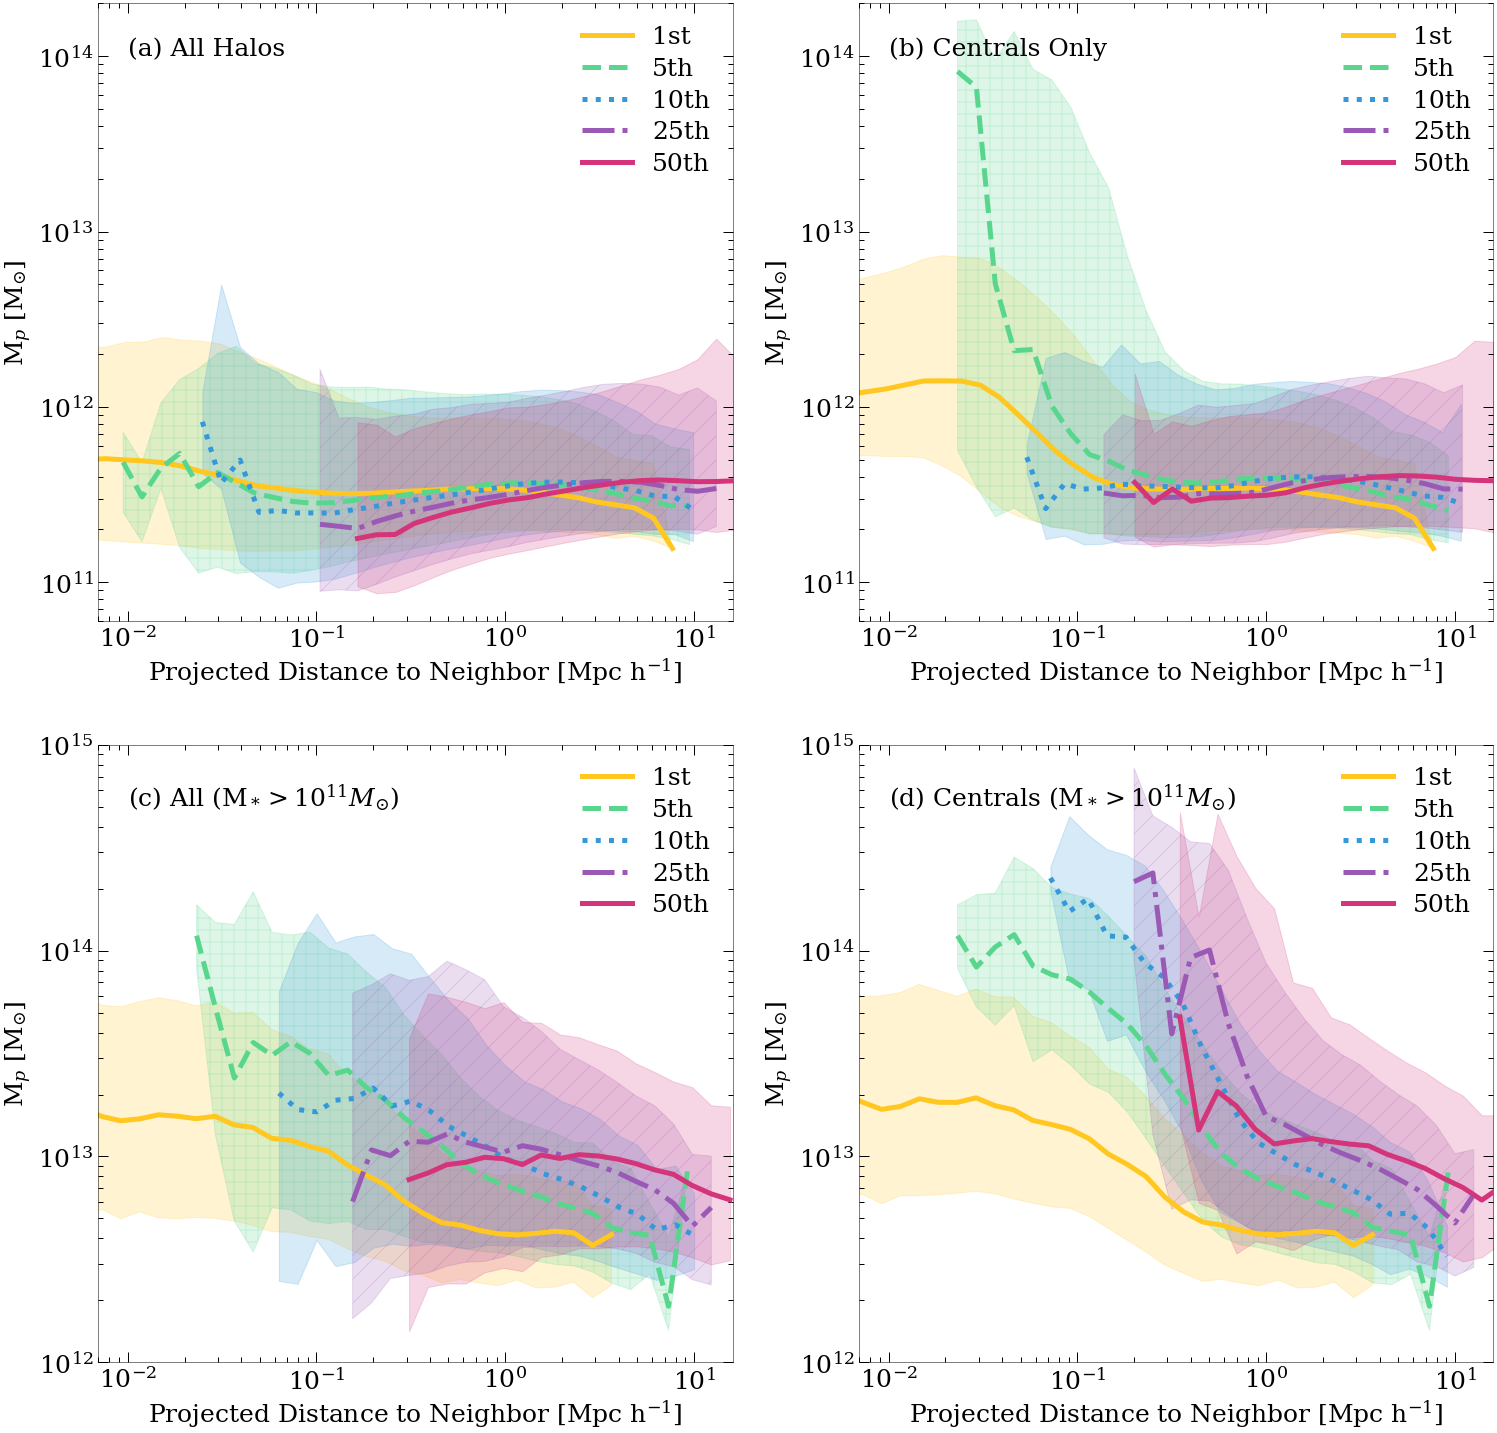

In [24]:
############### NEIGHBOR DISTANCES #####################

fig,axs = plt.subplots(2,2, figsize=(25,25),facecolor='w')
plt.rcParams['font.size']= 25
plt.rcParams['figure.facecolor'] = 'w'

dists = [1,5,10,25,50]
colors = ['#ffc71f','#58D68D',
          '#3498DB','#9B59B6','#D4357A']
labels = ['1st','5th','10th','25th','50th']
hatches = [None,'+',None,'/',None]
ls = ['solid','dashed','dotted','dashdot','solid']


ax1 = axs[0,0]

for i in range(len(dists)):
    Distance = SMDPL['Distance('+str(dists[i])+')']
    #bins = pow(10,np.arange(-2.5,1.5,0.1))
    bins = pow(10,np.arange(np.log10(min(Distance)),np.log10(max(Distance)),0.1))
    edges,centers,q1,q2,q3 = bin_data(Distance,SMDPL['Halo_Mass']/h,bins)
    ax1.plot(centers,q2,linestyle=ls[i],
                color=colors[i],label=labels[i],lw=5)
    ax1.fill_between(centers,q1,q3,alpha=0.2,color=colors[i],hatch=hatches[i])

ax1.set(ylabel=r'M$_p$ [M$_{\odot}$]',
        xlabel=r'Projected Distance to Neighbor [Mpc h$^{-1}$]',
        xscale='log',yscale='log',xlim=(0.007,16),ylim=(6e10,2e14))

ax1.tick_params(which='major', width=1.0, length=10,labelsize=25,pad=5)
ax1.tick_params(which='minor', width=1.0, length=5,labelsize=25)

ax1.legend(loc=1,fontsize=25,markerscale=2.0,
          labelspacing=0.35,frameon=False,ncol=1)

ax1.annotate("(a) All Halos",(0.01,1e14))


ax2 = axs[0,1]

for i in range(len(dists)):
    Distance = centrals['Distance('+str(dists[i])+')']
    bins = pow(10,np.arange(np.log10(min(Distance)),np.log10(max(Distance)),0.1))
    edges,centers,q1,q2,q3 = bin_data(Distance,centrals['Halo_Mass']/h,bins)
    ax2.plot(centers,q2,linestyle=ls[i],
                color=colors[i],label=labels[i],lw=5)
    ax2.fill_between(centers,q1,q3,alpha=0.2,color=colors[i],hatch=hatches[i])

ax2.set(ylabel=r'M$_p$ [M$_{\odot}$]',
        xlabel=r'Projected Distance to Neighbor [Mpc h$^{-1}$]',
        xscale='log',yscale='log',xlim=(0.007,16),ylim=(6e10,2e14))

ax2.tick_params(which='major', width=1.0, length=10,labelsize=25,pad=5)
ax2.tick_params(which='minor', width=1.0, length=5,labelsize=25)

ax2.legend(loc=1,fontsize=25,markerscale=2.0,
          labelspacing=0.35,frameon=False,ncol=1)

ax2.annotate("(b) Centrals Only",(0.01,1e14))

SMDPL_high = SMDPL[SMDPL['Stellar_Mass(0)']>1e11]

ax3 = axs[1,0]

for i in range(len(dists)):
    Distance = SMDPL_high['Distance('+str(dists[i])+')']
    bins = pow(10,np.arange(np.log10(min(Distance)),np.log10(max(Distance)),0.1))
    edges,centers,q1,q2,q3 = bin_data(Distance,SMDPL_high['Halo_Mass']/h,bins)
    ax3.plot(centers,q2,linestyle=ls[i],
                color=colors[i],label=labels[i],lw=5)
    ax3.fill_between(centers,q1,q3,alpha=0.2,color=colors[i],hatch=hatches[i])

ax3.set(ylabel=r'M$_p$ [M$_{\odot}$]',
        xlabel=r'Projected Distance to Neighbor [Mpc h$^{-1}$]',
        xscale='log',yscale='log',xlim=(0.007,16),ylim=(1e12,1e15))

ax3.tick_params(which='major', width=1.0, length=10,labelsize=25,pad=5)
ax3.tick_params(which='minor', width=1.0, length=5,labelsize=25)

ax3.legend(loc=1,fontsize=25,markerscale=2.0,
          labelspacing=0.35,frameon=False,ncol=1)

ax3.annotate("(c) All (M$_* > 10^{11} M_{\odot}$)",(0.01,5e14))

centrals_high = centrals[centrals['Stellar_Mass(0)']>1e11]

ax4 = axs[1,1]

for i in range(len(dists)):
    Distance = centrals_high['Distance('+str(dists[i])+')']
    bins = pow(10,np.arange(np.log10(min(Distance)),np.log10(max(Distance)),0.1))
    edges,centers,q1,q2,q3 = bin_data(Distance,centrals_high['Halo_Mass']/h,bins)
    ax4.plot(centers,q2,linestyle=ls[i],
                color=colors[i],label=labels[i],lw=5)
    ax4.fill_between(centers,q1,q3,alpha=0.2,color=colors[i],hatch=hatches[i])

ax4.set(ylabel=r'M$_p$ [M$_{\odot}$]',
        xlabel=r'Projected Distance to Neighbor [Mpc h$^{-1}$]',
        xscale='log',yscale='log',xlim=(0.007,16),ylim=(1e12,1e15))

ax4.tick_params(which='major', width=1.0, length=10,labelsize=25,pad=5)
ax4.tick_params(which='minor', width=1.0, length=5,labelsize=25)

ax4.legend(loc=1,fontsize=25,markerscale=2.0,
          labelspacing=0.35,frameon=False,ncol=1)

ax4.annotate("(d) Centrals (M$_* > 10^{11} M_{\odot}$)",(0.01,5e14))

plt.savefig("Figures/Dists2.pdf")

## Halo Mass vs. Counts in Cylinders

Includes only smallest redshift bin of $\Delta z = 0-250$ km/s

(Low mass end is quite flat and uninteresting so excluded here)

a. All halos hosting galaxies with $M_*>10^{11} M_{\odot}$

b. Centrals hosting galaixes with $M_*>10^{11} M_{\odot}$

In [16]:
############### NEIGHBOR COUNTS #################
loc_Cyl_05 = []
loc_Cyl_1 = []
loc_Cyl_2 = []
loc_Cyl_5 = []

cyl_columns = SMDPL[SMDPL.filter(like='c_0').columns]
#cyl_columns = SMDPL[SMDPL.columns.drop(list(SMDPL.filter(like='c_1')))]
for x in range(len(column_labels)):
    if column_labels[x] in cyl_columns.keys():
        if "0.5Mpc" in column_labels[x]:
            loc_Cyl_05.append(x)
        elif "1Mpc" in column_labels[x]:
            loc_Cyl_1.append(x)
        elif "2Mpc" in column_labels[x]:
            loc_Cyl_2.append(x)
        elif "_5Mpc" in column_labels[x]:
            loc_Cyl_5.append(x)

column_indices['Cyl_05'] = loc_Cyl_05
column_indices['Cyl_1'] = loc_Cyl_1
column_indices['Cyl_2'] = loc_Cyl_2
column_indices['Cyl_5'] = loc_Cyl_5

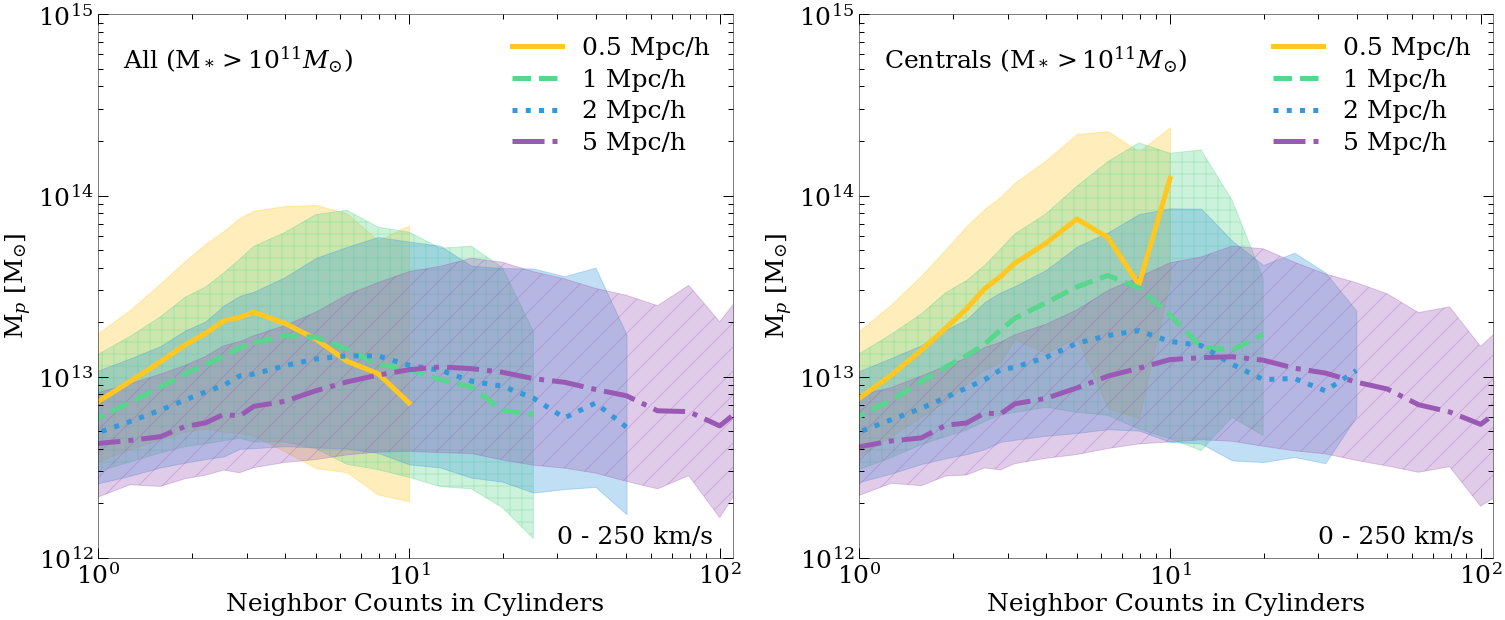

In [25]:
SMDPL_high = SMDPL[SMDPL['Stellar_Mass(0)']>1e11]

fig,axs = plt.subplots(1,2,figsize=(25,10),facecolor='w')
plt.rcParams['font.size']= 25
plt.rcParams['figure.facecolor'] = 'w'

colors = ['#ffc71f','#58D68D',
          '#3498DB','#9B59B6','#D4357A']
labels = ['0.5 Mpc/h','1 Mpc/h',
          '2 Mpc/h','5 Mpc/h']
rads = ['0.5','1','2','5']
hatches = [None,'+',None,'/',None]
ls = ['solid','dashed','dotted','dashdot','solid']

ax1 = axs[0]


for i in range(len(rads)):
    counts = SMDPL_high['Cylinder_'+rads[i]+'Mpc_0_250kms']
    nbins = np.append([0.1,1,2,3,4,5,6,7,8,9,10],pow(10,np.arange(1.1,np.log10(max(counts)),0.1)))
    bin_edges,bin_centers,bin_Q1,bin_med,bin_Q3 = bin_data(counts,SMDPL_high['Halo_Mass']/h,nbins)
    ax1.plot(bin_centers,bin_med,linestyle=ls[i],label=labels[i],lw=5,
                color=colors[i])
    ax1.fill_between(bin_centers,bin_Q1,bin_Q3,alpha=0.3,color=colors[i],hatch=hatches[i])

ax1.set(ylabel=r'M$_p$ [M$_{\odot}$]',
        xlabel=r'Neighbor Counts in Cylinders',
        xscale='log',yscale='log',xlim=(1,110),ylim=(1e12,1e15))

ax1.tick_params(which='major', width=1.0, length=10,labelsize=25,pad=5)
ax1.tick_params(which='minor', width=1.0, length=5,labelsize=25)

ax1.legend(loc=1,fontsize=25,markerscale=2.0,
          labelspacing=0.35,frameon=False,ncol=1)

ax1.annotate("All (M$_* > 10^{11} M_{\odot}$)",(1.2,5e14))
ax1.annotate("0 - 250 km/s",(30,1.2e12))

ax2 = axs[1]
centrals_high = centrals[centrals['Stellar_Mass(0)']>1e11]

for i in range(len(rads)):
    counts = centrals_high['Cylinder_'+rads[i]+'Mpc_0_250kms']
    nbins = np.append([0.1,1,2,3,4,5,6,7,8,9,10],pow(10,np.arange(1.1,np.log10(max(counts)),0.1)))
    bin_edges,bin_centers,bin_Q1,bin_med,bin_Q3 = bin_data(counts,centrals_high['Halo_Mass']/h,nbins)
    ax2.plot(bin_centers,bin_med,linestyle=ls[i],label=labels[i],lw=5,
                color=colors[i])
    ax2.fill_between(bin_centers,bin_Q1,bin_Q3,alpha=0.3,color=colors[i],hatch=hatches[i])

ax2.set(ylabel=r'M$_p$ [M$_{\odot}$]',
        xlabel=r'Neighbor Counts in Cylinders',
        xscale='log',yscale='log',xlim=(1,110),ylim=(1e12,1e15))

ax2.tick_params(which='major', width=1.0, length=10,labelsize=25,pad=5)
ax2.tick_params(which='minor', width=1.0, length=5,labelsize=25)

ax2.legend(loc=1,fontsize=25,markerscale=2.0,
          labelspacing=0.35,frameon=False,ncol=1)

ax2.annotate("Centrals (M$_* > 10^{11} M_{\odot}$)",(1.2,5e14))
ax2.annotate("0 - 250 km/s",(30,1.2e12))

plt.savefig("Figures/Counts2.pdf")